<a href="https://colab.research.google.com/github/Datasciencelaw/Datascience/blob/APRENDIZADO-DE-M%C3%81QUINA-N%C3%83O-SUPERVISIONADO/Checkout_de_Presen%C3%A7a_do_M%C3%B3dulo_4_Aprendizado_de_m%C3%A1quina_n%C3%A3o_supervisionado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# Upload do arquivo
uploaded = files.upload()

# Verificar se o arquivo foi carregado
import os
os.listdir()

Saving housing.csv to housing (2).csv


['.config', 'housing.csv', 'housing (2).csv', 'housing (1).csv', 'sample_data']

In [ ]:
import pandas as pd

In [ ]:
# Informações gerais sobre o dataset
print(data.info())

# Estatísticas descritivas
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

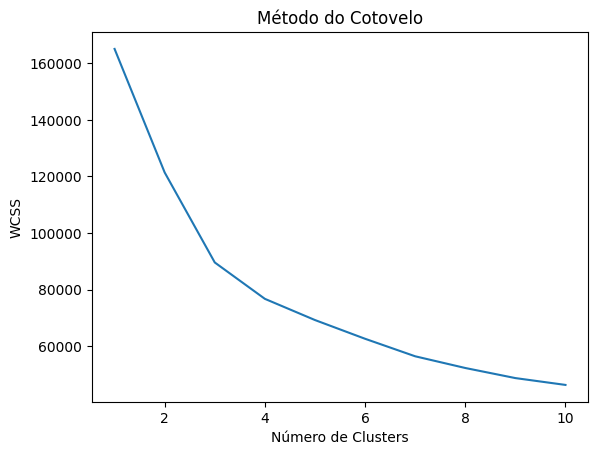

          longitude   latitude  housing_median_age   total_rooms  \
Cluster                                                            
0       -118.021374  33.938533           30.725984   1947.139731   
1       -121.731539  37.986832           30.428684   2044.626064   
2       -118.886141  35.095820           12.202572  13779.051447   
3       -119.156630  35.181905           18.893955   5253.169200   

         total_bedrooms   population   households  median_income  \
Cluster                                                            
0            406.751039  1148.982534   383.150211       3.881956   
1            407.105249  1033.857498   377.921938       3.749902   
2           2635.287097  6782.771704  2384.389068       4.406561   
3           1083.981583  2781.441743   997.743668       4.088695   

         median_house_value  
Cluster                      
0             211998.366999  
1             194786.956778  
2             214747.295820  
3             220242.867612  
An

In [ ]:
# Selecionar as colunas relevantes para o clustering
features = data[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
                 'population', 'households', 'median_income']]

# Tratar valores nulos preenchendo com a mediana
features = features.fillna(features.median())

# Normalizar os dados
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Determinar o número ótimo de clusters usando o método do cotovelo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plotar o gráfico do cotovelo
plt.plot(range(1, 11), wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

# Escolher o número ótimo de clusters (por exemplo, 4)
optimal_clusters = 4

# Aplicar K-means com o número ótimo de clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Adicionar os rótulos dos clusters ao dataset original
data['Cluster'] = clusters

# Selecionar apenas colunas numéricas para a análise dos clusters
numerical_columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms',
                     'population', 'households', 'median_income', 'median_house_value']

# Analisar cada cluster calculando os valores médios das características para cada cluster
cluster_analysis = data[numerical_columns + ['Cluster']].groupby('Cluster').mean()

print(cluster_analysis)

# Salvar os dados clusterizados em um novo arquivo CSV
data.to_csv('clustered_housing_data.csv', index=False)

print("Análise dos clusters e dados clusterizados foram salvos em 'clustered_housing_data.csv'.")

In [ ]:
# Salvando a análise dos clusters em um arquivo CSV
cluster_analysis.to_csv('clustered_housing_data.csv')

# Baixando o arquivo no Google Colab
from google.colab import files
files.download('clustered_housing_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>